In [352]:
import msprime
import sys
import numpy as np
import seaborn as sns
from IPython.display import SVG
import matplotlib.pyplot as plt
from itertools import chain

In [391]:
#Reference Population
pop_configs = [
    msprime.PopulationConfiguration(sample_size=300)]
ts_ref = msprime.simulate(
    population_configurations=pop_configs,mutation_rate=0.25,random_seed=9)

In [392]:
#ABC Function
def ABC(data,eps,pop_configs,prior="exponential",prior_parameters=1,iters=1000):
    ref_stat = (data.diversity(),data.Tajimas_D(),data.segregating_sites())
    samples = []
    norm_mean = 0
    if prior == "exponential":
        for i in range(0,iters):
            mutation_rate_sim = np.random.exponential(prior_parameters)
            ts_sim = msprime.simulate(population_configurations=pop_configs,mutation_rate=mutation_rate_sim)
            sim_stat = (ts_sim.diversity(),ts_sim.Tajimas_D(),ts_sim.segregating_sites())
            if np.linalg.norm(np.subtract(ref_stat,sim_stat)) < eps:
                samples.append(mutation_rate_sim)
                norm_mean += np.linalg.norm(np.subtract(ref_stat,sim_stat))
            elif eps <= np.linalg.norm(np.subtract(ref_stat,sim_stat)) < 99999999:
                norm_mean += np.linalg.norm(np.subtract(ref_stat,sim_stat))
    elif prior == "uniform":
        for i in range(0,iters):
            mutation_rate_sim = np.random.uniform(prior_parameters[0],prior_parameters[1])
            ts_sim = msprime.simulate(population_configurations=pop_configs,mutation_rate=mutation_rate_sim)
            sim_stat = (ts_sim.diversity(),ts_sim.Tajimas_D(),ts_sim.segregating_sites())
            if np.linalg.norm(np.subtract(ref_stat,sim_stat)) < eps:
                samples.append(mutation_rate_sim)
                norm_mean += np.linalg.norm(np.subtract(ref_stat,sim_stat))
            elif eps <= np.linalg.norm(np.subtract(ref_stat,sim_stat)) < 99999999:
                norm_mean += np.linalg.norm(np.subtract(ref_stat,sim_stat))
    elif prior == "gamma":
        for i in range(0,iters):
            mutation_rate_sim = np.random.gamma(prior_parameters[0],prior_parameters[1])
            ts_sim = msprime.simulate(population_configurations=pop_configs,mutation_rate=mutation_rate_sim)
            sim_stat = (ts_sim.diversity(),ts_sim.Tajimas_D(),ts_sim.segregating_sites())
            if np.linalg.norm(np.subtract(ref_stat,sim_stat)) < eps:
                samples.append(mutation_rate_sim)
                norm_mean += np.linalg.norm(np.subtract(ref_stat,sim_stat))
            elif eps <= np.linalg.norm(np.subtract(ref_stat,sim_stat)) < 99999999:
                norm_mean += np.linalg.norm(np.subtract(ref_stat,sim_stat))
    return(samples,norm_mean/iterations)




In [407]:
#ABC Function with standardised statistics
def ABCalt(data,eps,pop_configs,prior="exponential",prior_parameters=1,iters=1000):
    ref_stat = (data.diversity(),data.Tajimas_D(),data.segregating_sites())
    samples = []
    norm_mean = 0
    if prior == "exponential":
        for i in range(0,iters):
            mutation_rate_sim = np.random.exponential(prior_parameters)
            ts_sim = msprime.simulate(population_configurations=pop_configs,mutation_rate=mutation_rate_sim)
            sim_stat = (ts_sim.diversity()/data.diversity(),ts_sim.Tajimas_D()/data.Tajimas_D(),ts_sim.segregating_sites()/data.segregating_sites())
            if np.linalg.norm(np.subtract(sim_stat,(1,1,1))) < eps:
                samples.append(mutation_rate_sim)
                norm_mean += np.linalg.norm(np.subtract(ref_stat,sim_stat))
            elif eps <= np.linalg.norm(np.subtract(ref_stat,sim_stat)) < 99999999:
                norm_mean += np.linalg.norm(np.subtract(ref_stat,sim_stat))
    elif prior == "uniform":
        for i in range(0,iters):
            mutation_rate_sim = np.random.uniform(prior_parameters[0],prior_parameters[1])
            ts_sim = msprime.simulate(population_configurations=pop_configs,mutation_rate=mutation_rate_sim)
            sim_stat = (ts_sim.diversity()/data.diversity(),ts_sim.Tajimas_D()/data.Tajimas_D(),ts_sim.segregating_sites()/data.segregating_sites())
            if np.linalg.norm(np.subtract(sim_stat,(1,1,1))) < eps:
                samples.append(mutation_rate_sim)
                norm_mean += np.linalg.norm(np.subtract(ref_stat,sim_stat))
            elif eps <= np.linalg.norm(np.subtract(ref_stat,sim_stat)) < 99999999:
                norm_mean += np.linalg.norm(np.subtract(ref_stat,sim_stat))
    elif prior == "gamma":
        for i in range(0,iters):
            mutation_rate_sim = np.random.gamma(prior_parameters[0],prior_parameters[1])
            ts_sim = msprime.simulate(population_configurations=pop_configs,mutation_rate=mutation_rate_sim)
            sim_stat = (ts_sim.diversity()/data.diversity(),ts_sim.Tajimas_D()/data.Tajimas_D(),ts_sim.segregating_sites()/data.segregating_sites())
            if np.linalg.norm(np.subtract(sim_stat,(1,1,1))) < eps:
                samples.append(mutation_rate_sim)
                norm_mean += np.linalg.norm(np.subtract(ref_stat,sim_stat))
            elif eps <= np.linalg.norm(np.subtract(ref_stat,sim_stat)) < 99999999:
                norm_mean += np.linalg.norm(np.subtract(ref_stat,sim_stat))
    return(samples,norm_mean/iterations)

In [394]:
%%time
#Each algorithm takes ~ 5 minutes to complete
#Exponential prior scale 1 
iterations = 100000
eps = 1
prior= "exponential"
prior_parameters = 1
attempt1 = ABC(ts_ref,eps=eps,pop_configs=pop_configs,prior=prior,prior_parameters=prior_parameters,iters=iterations)


Wall time: 5min 22s


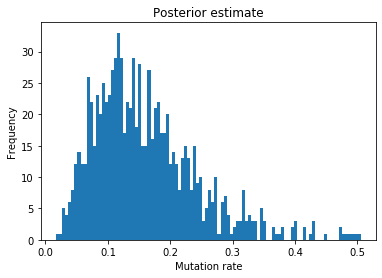

Acceptance probability : 0.00917
Mean norm :  23.118803752053612


In [395]:
plt.hist(attempt1[0], bins = 100)
plt.ylabel('Frequency')
plt.xlabel('Mutation rate')
plt.title('Posterior estimate')
plt.show()
print("Acceptance probability :",len(attempt1[0])/iterations)
print("Mean norm : ",attempt1[1])

In [396]:
%%time
#Exponential prior scale 0.1
iterations = 100000
eps = 1
prior = "exponential"
prior_parameters = 0.1
attempt2 = ABC(ts_ref,eps=eps,pop_configs=pop_configs,prior=prior,prior_parameters=prior_parameters,iters=iterations)


Wall time: 5min 7s


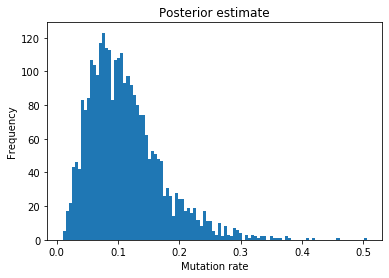

Acceptance probability : 0.02888
Mean norm :  2.055066104353168


In [397]:
plt.hist(attempt2[0], bins = 100)
plt.ylabel('Frequency')
plt.xlabel('Mutation rate')
plt.title('Posterior estimate')
plt.show()
print("Acceptance probability :",len(attempt2[0])/iterations)
print("Mean norm : ",attempt2[1])

In [398]:
%%time
#Gamma(0.5,1) prior
iterations = 100000
eps = 1
prior = "gamma"
prior_parameters = (0.5,1)
attempt3 = ABC(ts_ref,eps=eps,pop_configs=pop_configs,prior=prior,prior_parameters=prior_parameters,iters=iterations)


Wall time: 5min 2s


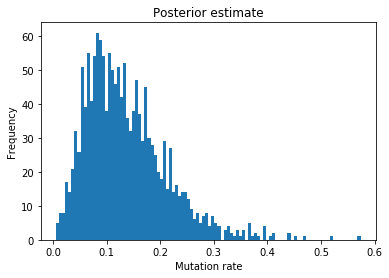

Acceptance probability : 0.0152
Mean norm :  11.158080116817004


In [399]:
plt.hist(attempt3[0], bins = 100)
plt.ylabel('Frequency')
plt.xlabel('Mutation rate')
plt.title('Posterior estimate')
plt.show()
print("Acceptance probability :",len(attempt3[0])/iterations)
print("Mean norm : ",attempt3[1])

In [400]:
%%time
#Uniform(0,1) prior
iterations = 100000
eps = 1
prior = "uniform"
prior_parameters = (0,1)
attempt4 = ABC(ts_ref,eps=eps,pop_configs=pop_configs,prior=prior,prior_parameters=prior_parameters,iters=iterations)


Wall time: 5min 2s


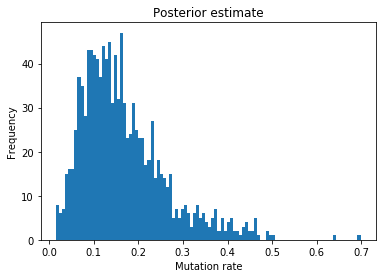

Acceptance probability : 0.01142
Mean norm :  10.363947207133416


In [401]:
plt.hist(attempt4[0], bins = 100)
plt.ylabel('Frequency')
plt.xlabel('Mutation rate')
plt.title('Posterior estimate')
plt.show()
print("Acceptance probability :",len(attempt4[0])/iterations)
print("Mean norm : ",attempt4[1])

In [402]:
%%time
#Gamma(0.5,1) prior, eps increased to 2, iterations halved
iterations = 50000
eps = 2
prior = "gamma"
prior_parameters = (0.5,1)
attempt5 = ABC(ts_ref,eps=eps,pop_configs=pop_configs,prior=prior,prior_parameters=prior_parameters,iters=iterations)


Wall time: 2min 31s


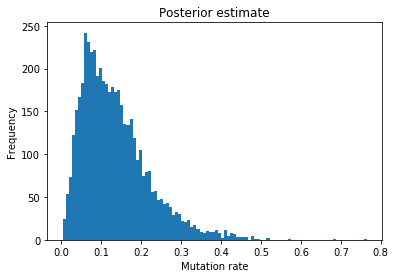

Acceptance probability : 0.09838
Mean norm :  10.993555038537004


In [403]:
plt.hist(attempt5[0], bins = 100)
plt.ylabel('Frequency')
plt.xlabel('Mutation rate')
plt.title('Posterior estimate')
plt.show()
print("Acceptance probability :",len(attempt5[0])/iterations)
print("Mean norm : ",attempt5[1])

In [408]:
%%time
#Exponential prior scale 0.1, standardized statistics
iterations = 100000
eps = 1
prior = "exponential"
prior_parameters = 0.1
attempt6 = ABCalt(ts_ref,eps=eps,pop_configs=pop_configs,prior=prior,prior_parameters=prior_parameters,iters=iterations)


Wall time: 6min 14s


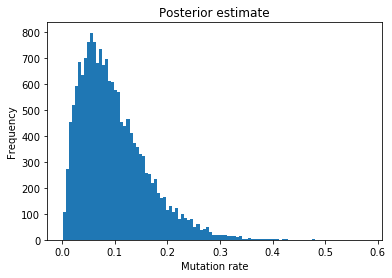

Acceptance probability : 0.17441
Mean norm :  1.8585072641012244


In [409]:
plt.hist(attempt6[0], bins = 100)
plt.ylabel('Frequency')
plt.xlabel('Mutation rate')
plt.title('Posterior estimate')
plt.show()
print("Acceptance probability :",len(attempt6[0])/iterations)
print("Mean norm : ",attempt6[1])